<a href="https://colab.research.google.com/github/iMan0405/Data_Science_Cert/blob/main/Aviakompaniya_yo'lovchilarining_qoniqishi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aviakompaniya yo'lovchilarining qoniqishi darajasi

### Kutubxonalarni yuklab olamiz

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
import pickle

### Fayllarni yuklab olamiz va ma'lumotlarini ko'rib chiqamiz

In [36]:
sample_submission = pd.read_csv('/content/sample_submission.csv', index_col=0)
test_dataset = pd.read_csv('/content/test_dataset.csv', index_col=0)
train_dataset = pd.read_csv('/content/train_dataset.csv', index_col=0)

In [37]:
sample_submission.head()

,satisfaction
id,
1,0
2,0
3,0
4,0
5,0


In [38]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   satisfaction  4000 non-null   int64
dtypes: int64(1)
memory usage: 62.5 KB


In [39]:
test_dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0


In [40]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   object 
 1   Customer Type                      4000 non-null   object 
 2   Age                                4000 non-null   int64  
 3   Type of Travel                     4000 non-null   object 
 4   Class                              4000 non-null   object 
 5   Flight Distance                    4000 non-null   int64  
 6   Inflight wifi service              4000 non-null   int64  
 7   Departure/Arrival time convenient  4000 non-null   int64  
 8   Ease of Online booking             4000 non-null   int64  
 9   Gate location                      4000 non-null   int64  
 10  Food and drink                     4000 non-null   int64  
 11  Online boarding                    4000 non-null   int64

### Arrival Delay in Minutes ustini qatorlari barchasi to'ldirilmagan, shu sababli fillna() metodi bilan to'ldiramiz

In [41]:
test_dataset.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [42]:
test_dataset['Arrival Delay in Minutes'].fillna(test_dataset['Arrival Delay in Minutes'].mean(), inplace=True)

In [43]:
test_dataset.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [44]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   object 
 1   Customer Type                      4000 non-null   object 
 2   Age                                4000 non-null   int64  
 3   Type of Travel                     4000 non-null   object 
 4   Class                              4000 non-null   object 
 5   Flight Distance                    4000 non-null   int64  
 6   Inflight wifi service              4000 non-null   int64  
 7   Departure/Arrival time convenient  4000 non-null   int64  
 8   Ease of Online booking             4000 non-null   int64  
 9   Gate location                      4000 non-null   int64  
 10  Food and drink                     4000 non-null   int64  
 11  Online boarding                    4000 non-null   int64

In [45]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [46]:
train_dataset.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [47]:
train_dataset['Arrival Delay in Minutes'].fillna(test_dataset['Arrival Delay in Minutes'].mean(), inplace=True)

In [48]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

### train dataset ni describe ni ko'ramiz

In [49]:
train_dataset.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.708342,0.500000
std,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,39.990256,0.500025
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


Korrlatsiyani ko'ramiz

In [50]:
train_dataset.corrwith(train_dataset['satisfaction']).abs().sort_values(ascending=False)

<ipython-input-50-15b8c9d5e42e>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_dataset.corrwith(train_dataset['satisfaction']).abs().sort_values(ascending=False)


satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048582
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64

### Qiymatlar nisbatini tekshirib ko'ramiz

In [51]:
train_dataset['satisfaction'].value_counts()/len(train_dataset)*100

0    50.0
1    50.0
Name: satisfaction, dtype: float64

### Nisbatini grafik ko'rinishda chiqaramiz

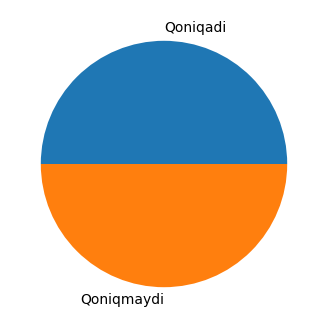

In [52]:
nisbat = train_dataset['satisfaction'].value_counts()/len(train_dataset)*100
plt.figure(figsize=(4, 4))
plt.pie(nisbat, labels=['Qoniqadi', 'Qoniqmaydi'])
plt.show()

### Online boarding, Inflight entertainment, Seat comfort, On-board service sonli ustunlarni tahlil qilib ko'ramiz

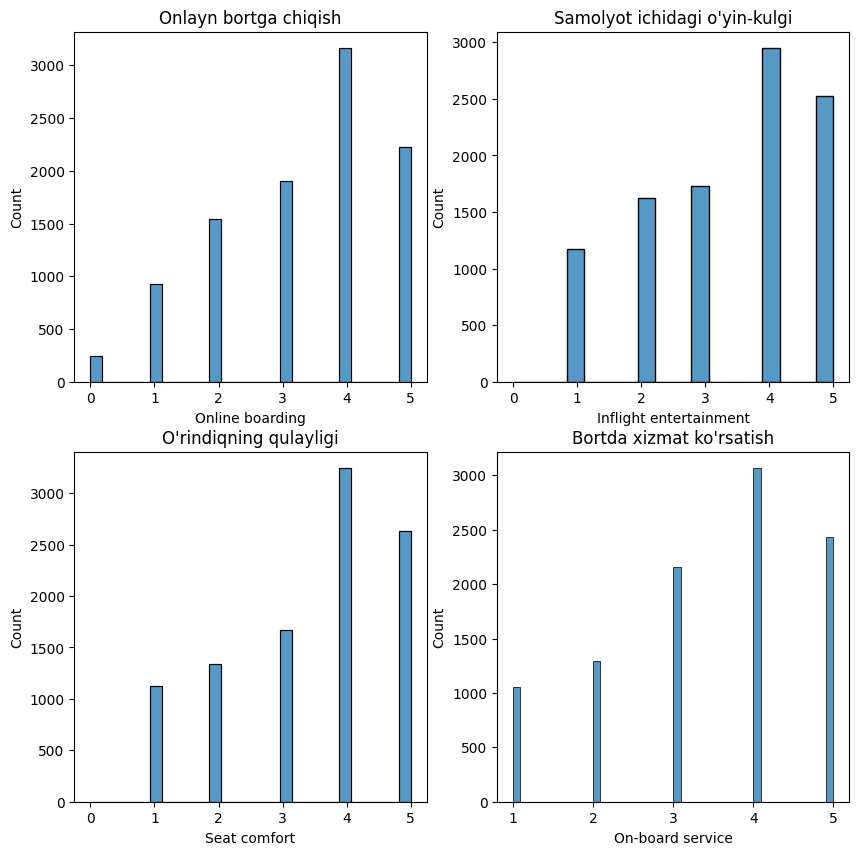

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

#Online boarding
sns.histplot(x='Online boarding', data=train_dataset, ax=axes[0, 0])
axes[0, 0].set_title('Onlayn bortga chiqish')

#Inflight entertainment
sns.histplot(x='Inflight entertainment', data=train_dataset, ax=axes[0, 1])
axes[0, 1].set_title("Samolyot ichidagi o'yin-kulgi")

#Seat comfort
sns.histplot(x='Seat comfort', data=train_dataset, ax=axes[1, 0])
axes[1, 0].set_title("O'rindiqning qulayligi")

#On-board service
sns.histplot(x='On-board service', data=train_dataset, ax=axes[1, 1])
axes[1, 1].set_title("Bortda xizmat ko'rsatish")
plt.show()

### Gender, Customer Type, Type of Travel, Class ustunlarni tahlil qilamiz

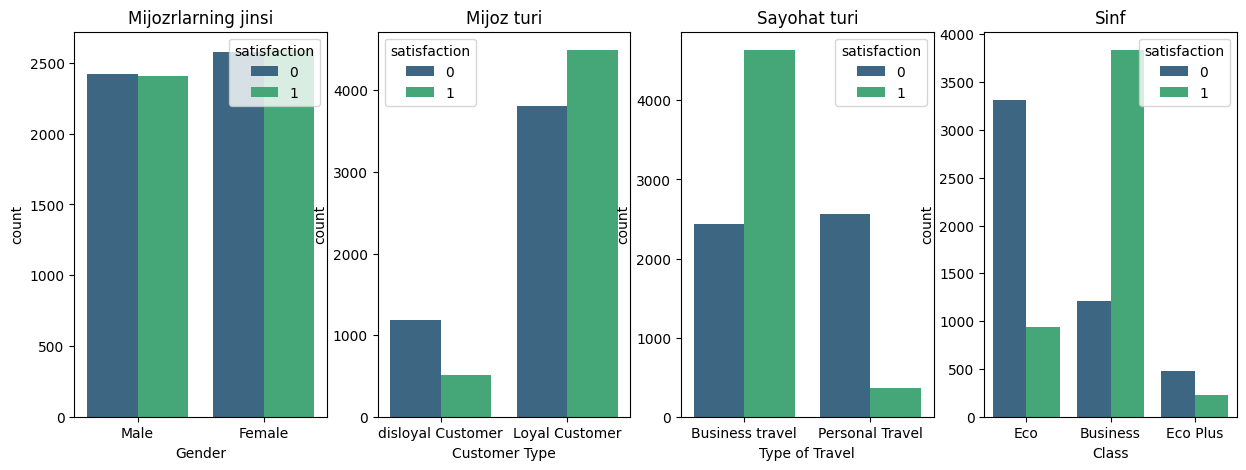

In [54]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

#Gender
sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=train_dataset, ax=axes[0])
axes[0].set_title("Mijozrlarning jinsi")

#Customer Type
sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=train_dataset, ax=axes[1])
axes[1].set_title('Mijoz turi')

#Type of Travel
sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=train_dataset, ax=axes[2])
axes[2].set_title('Sayohat turi')

#Class
sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=train_dataset, ax=axes[3])
axes[3].set_title('Sinf')
plt.show()

### Ma'lumotlarga ishlov berish

In [55]:
print(f"Mavjud bo'lmagan qiymatlar soni: {train_dataset.isnull().sum().sum()}")
qator = train_dataset[train_dataset.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {qator}")
print(f"Mavjud bo'lmagan qatorlar foizi: {np.round(qator/len(train_dataset)*100)} %")

Mavjud bo'lmagan qiymatlar soni: 0
Mavjud bo'lmagan qatorlar soni: 0
Mavjud bo'lmagan qatorlar foizi: 0.0 %


# Machine Learning ga tayyorgarlik

In [56]:
encoded = pd.get_dummies(train_dataset)
encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
1,33,571,2,3,2,4,4,2,4,4,...,0,0,1,0,1,1,0,0,1,0
2,49,1431,4,1,4,4,3,5,4,5,...,1,1,0,1,0,1,0,1,0,0
3,43,867,1,4,4,4,4,4,3,1,...,0,1,0,1,0,1,0,0,1,0
4,27,1550,3,3,3,3,2,2,2,2,...,1,1,0,1,0,1,0,1,0,0
5,11,526,3,4,3,2,4,3,4,4,...,0,0,1,1,0,0,1,0,1,0


In [57]:
X = encoded.drop('satisfaction', axis=1)
y = encoded['satisfaction']

In [58]:
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
1,33,571,2,3,2,4,4,2,4,4,...,3.0,0,1,0,1,1,0,0,1,0
2,49,1431,4,1,4,4,3,5,4,5,...,0.0,1,0,1,0,1,0,1,0,0
3,43,867,1,4,4,4,4,4,3,1,...,18.0,1,0,1,0,1,0,0,1,0
4,27,1550,3,3,3,3,2,2,2,2,...,0.0,1,0,1,0,1,0,1,0,0
5,11,526,3,4,3,2,4,3,4,4,...,10.0,0,1,1,0,0,1,0,1,0


In [59]:
y.head()

id
1    0
2    1
3    0
4    1
5    0
Name: satisfaction, dtype: int64

In [60]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

### Logistic Regression modeli

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.87      0.85      0.86      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Model aniqligi: 0.8655


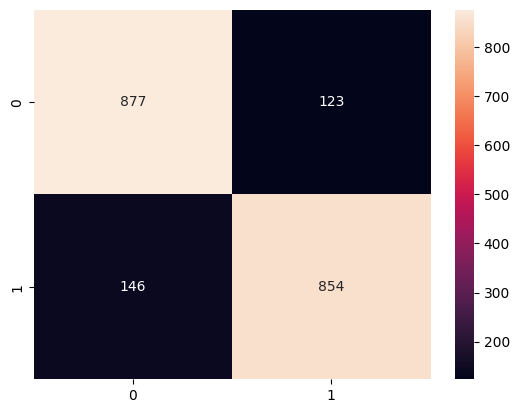

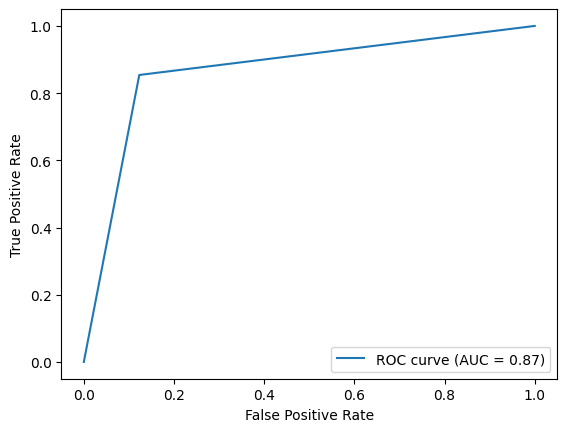

In [62]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predicted = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_predicted))
print(f"Model aniqligi: {metrics.accuracy_score(y_test, y_predicted)}")

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predicted)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Support Vector Machines modeli

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1000
           1       0.94      0.92      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqligi: 0.9325


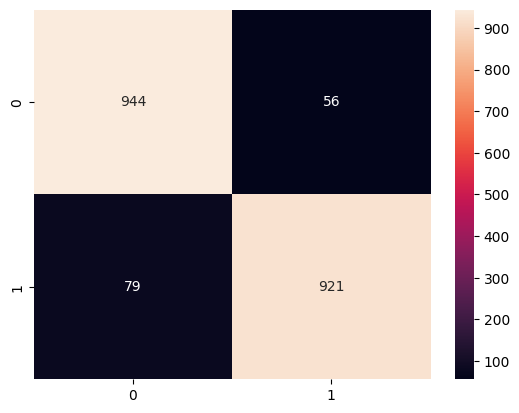

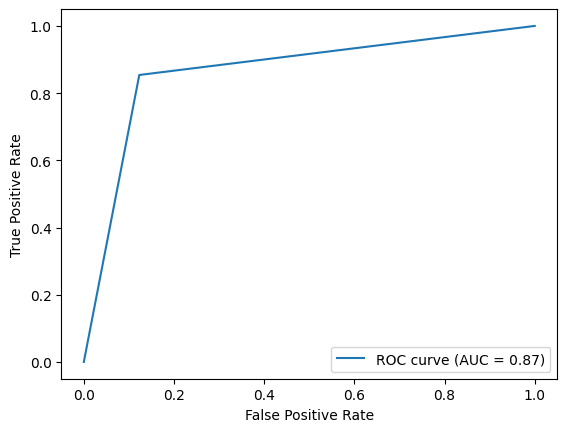

In [63]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predicted = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_predicted))
print(f"Model aniqligi: {metrics.accuracy_score(y_test, y_predicted)}")

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display_= metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Decision Tree modeli

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1000
           1       0.94      0.93      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqligi: 0.931


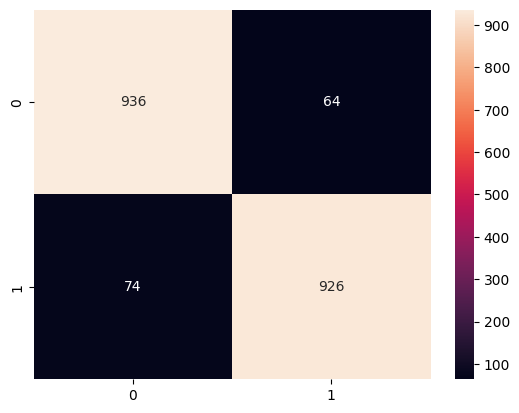

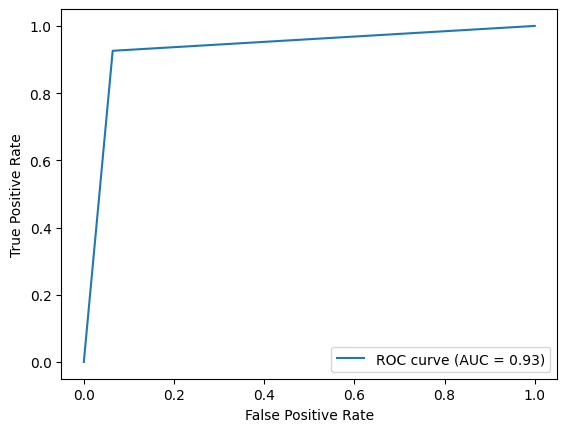

In [64]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predicted = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_predicted))
print(f"Model aniqligi: {metrics.accuracy_score(y_test, y_predicted)}")

# confusion matrix
conf_mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Tree model chizmasini ko'ramiz

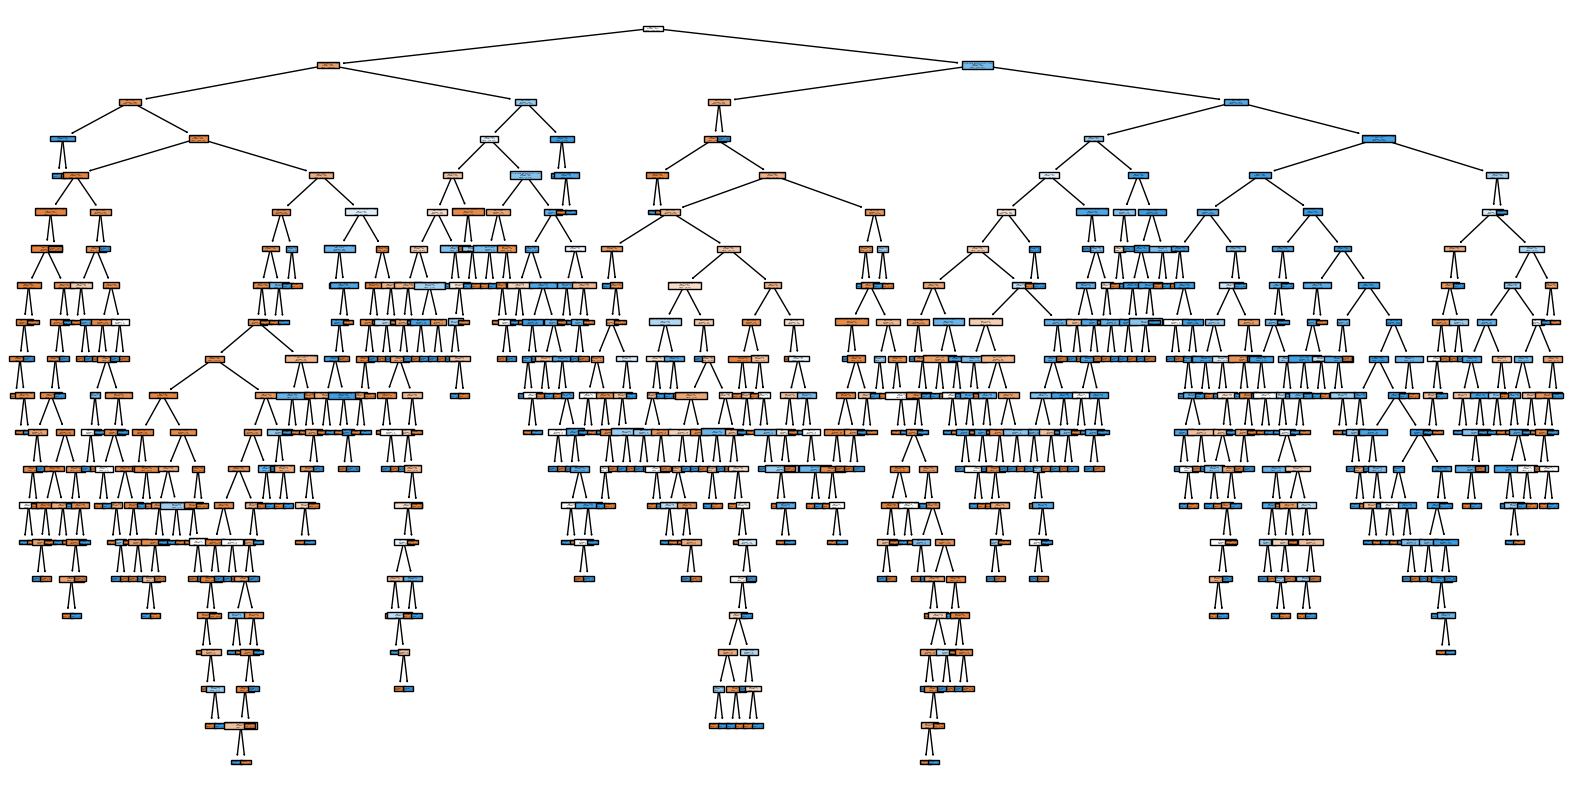

In [65]:
cols = encoded.drop('satisfaction', axis=1).columns
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

### Random Forest modeli

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1000
           1       0.94      0.94      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.9375


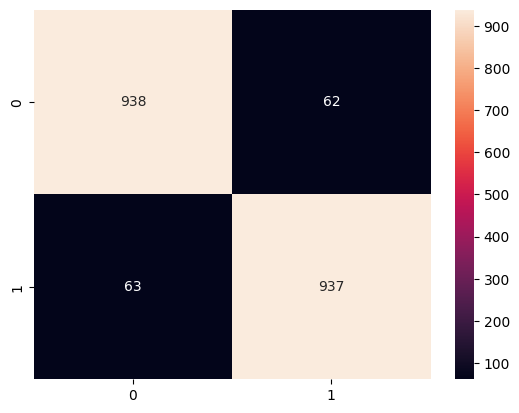

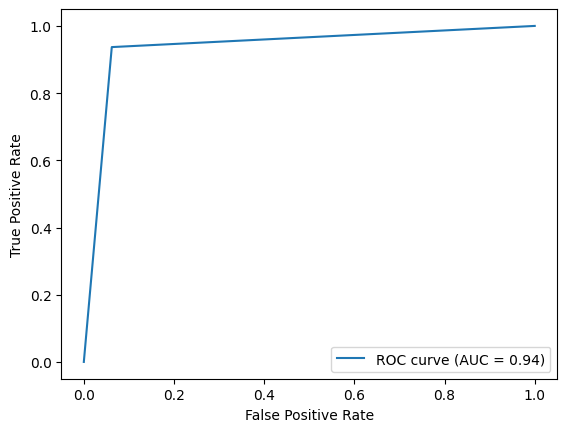

In [66]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predicted = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_predicted))
print(f"Model aniqligi: {metrics.accuracy_score(y_test, y_predicted)}")

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### XGBoost modeli

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1000
           1       0.96      0.94      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Model aniqligi: 0.95


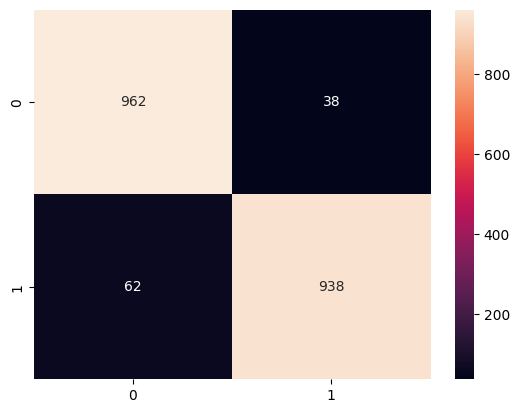

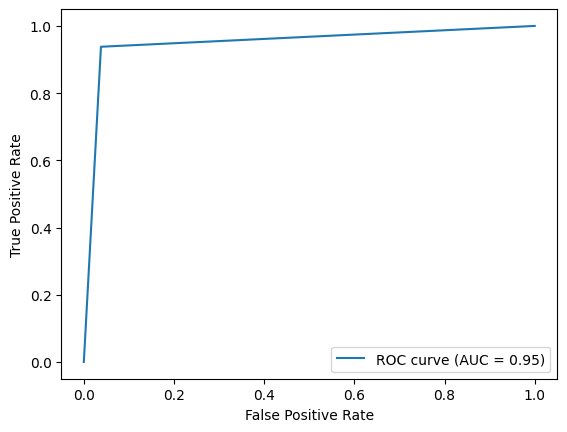

In [67]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predicted = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_predicted))
print(f"Model aniqligi: {metrics.accuracy_score(y_test, y_predicted)}")

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Demak eng yuqori aniqlikni XGBoost modeli beryapti shu sababli test_datasetni ushbu modelda prediction qilamiz va sample_submission ga qiymatlarni saqlaymiz

In [69]:
encoded = pd.get_dummies(test_dataset)
encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
1,25,2704,2,2,2,3,2,3,5,2,...,191.0,1,0,1,0,0,1,0,1,0
2,49,1623,1,1,1,1,3,4,4,2,...,52.0,1,0,1,0,1,0,1,0,0
3,51,338,4,4,4,4,2,5,5,5,...,0.0,0,1,1,0,1,0,1,0,0
4,34,95,0,0,0,3,5,0,1,5,...,0.0,0,1,1,0,1,0,0,0,1
5,34,602,4,4,4,3,4,5,5,5,...,140.0,0,1,1,0,0,1,0,1,0


In [70]:
scaler = StandardScaler()
Test = scaler.fit_transform(encoded)

In [71]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni predict qilamiz
y_predicted = xgb_model.predict(Test)
y_predicted

array([0, 1, 1, ..., 0, 1, 0])

In [73]:
sample_submission['satisfaction'] = y_predicted
sample_submission

,satisfaction
id,
1,0
2,1
3,1
4,1
5,1
...,...
3996,1
3997,0
3998,0


### Modelni saqlab olamiz

In [74]:
filename = 'xgb_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xgb_model, file)